In [1]:
import pathlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
test_images.shape

(10000, 28, 28)

In [29]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [30]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [64]:
class CNN(keras.Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn1 = keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1))
        self.pool1 = keras.layers.MaxPooling2D((2,2))
        self.cnn2 = keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')
        self.pool2 = keras.layers.MaxPooling2D((2,2))
        self.flat = keras.layers.Flatten()
        self.fc1 = keras.layers.Dense(128, activation='relu')
        self.out = keras.layers.Dense(10, activation='softmax')
    def call(self, x):
        x = self.cnn1(x)
        x = self.pool1(x)
        x = self.cnn2(x)
        x = self.pool1(x)
        x = self.flat(x)
        x = self.fc1(x)
        x = self.out(x)
        return x

In [65]:
model = CNN()

In [66]:
learning_rate = 1e-4
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

In [67]:
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.build(input_shape=(1, 28, 28, 1))
model.summary()

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\layer.py:357: UserWarning: `build()` was called on layer 'cnn_6', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "cnn_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [68]:
train_images.shape

(60000, 28, 28, 1)

In [69]:
train_labels.shape

(60000,)

In [73]:
hist = model.fit(train_images, train_labels, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.8299 - loss: 0.4754
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.8385 - loss: 0.4502
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.8462 - loss: 0.4293
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.8488 - loss: 0.4243
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.8578 - loss: 0.4065
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.8575 - loss: 0.3982
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.8626 - loss: 0.3816
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.8642 - loss: 0.3804
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.8660 - loss: 0.3701
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.8704 - loss: 0.3660


In [74]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8591 - loss: 0.3908


In [75]:
hist.history['accuracy']

[0.8337000012397766,
 0.8411166667938232,
 0.8463833332061768,
 0.8516833186149597,
 0.8574000000953674,
 0.8591166734695435,
 0.8617333173751831,
 0.8648666739463806,
 0.8666166663169861,
 0.869533360004425]

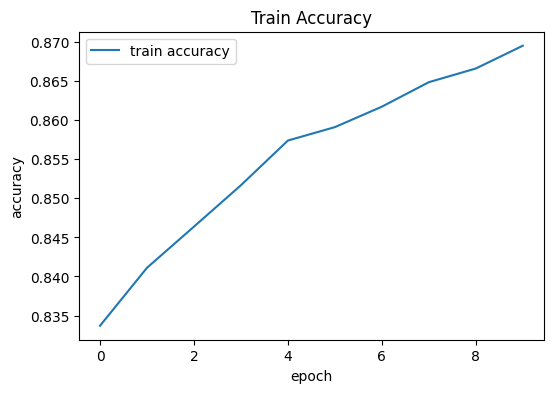

In [76]:
plt.figure(figsize=(6,4))
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.title('Train Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

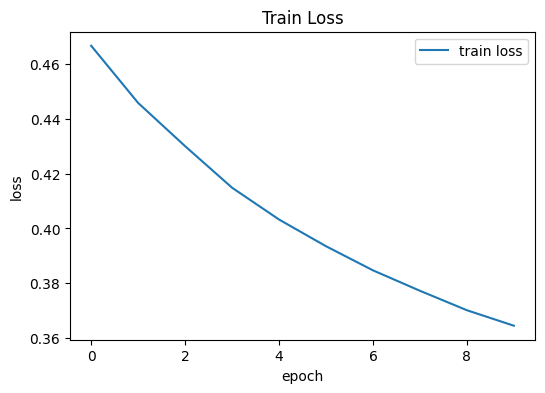

In [77]:
plt.figure(figsize=(6,4))
plt.plot(hist.history['loss'], label='train loss')
plt.title('Train Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()